In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Housedata.csv',index_col=0)

In [3]:
data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [4]:
categorical=['driveway','recroom','fullbase','gashw','airco','prefarea']

In [5]:
for col in categorical:
    
    temp=data.loc[:,col]
    c=temp.nunique()
    temp=temp.astype('category')
    temp.cat.categories=np.arange(c)
    
    data.loc[:,col]=temp

In [6]:
data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


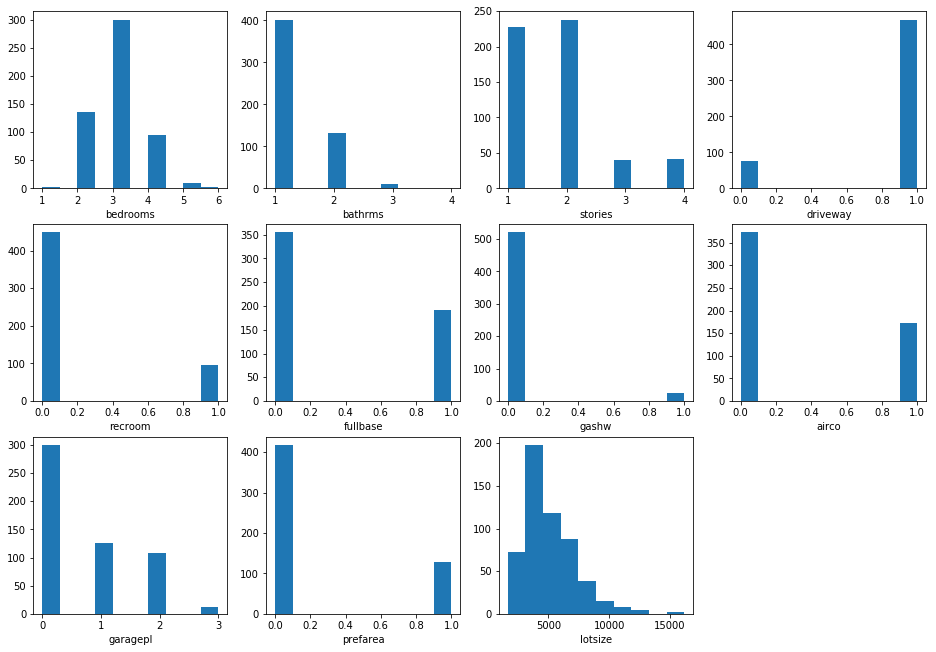

In [7]:
plt.figure(figsize=(16,15))
for i in range(2,12):
    plt.subplot(4,4,i-1)
    plt.xlabel(data.columns[i])
    plt.hist(data.iloc[:,i])

plt.subplot(4,4,11)
plt.hist(data.iloc[:,1])
plt.xlabel(data.columns[1])
plt.show()

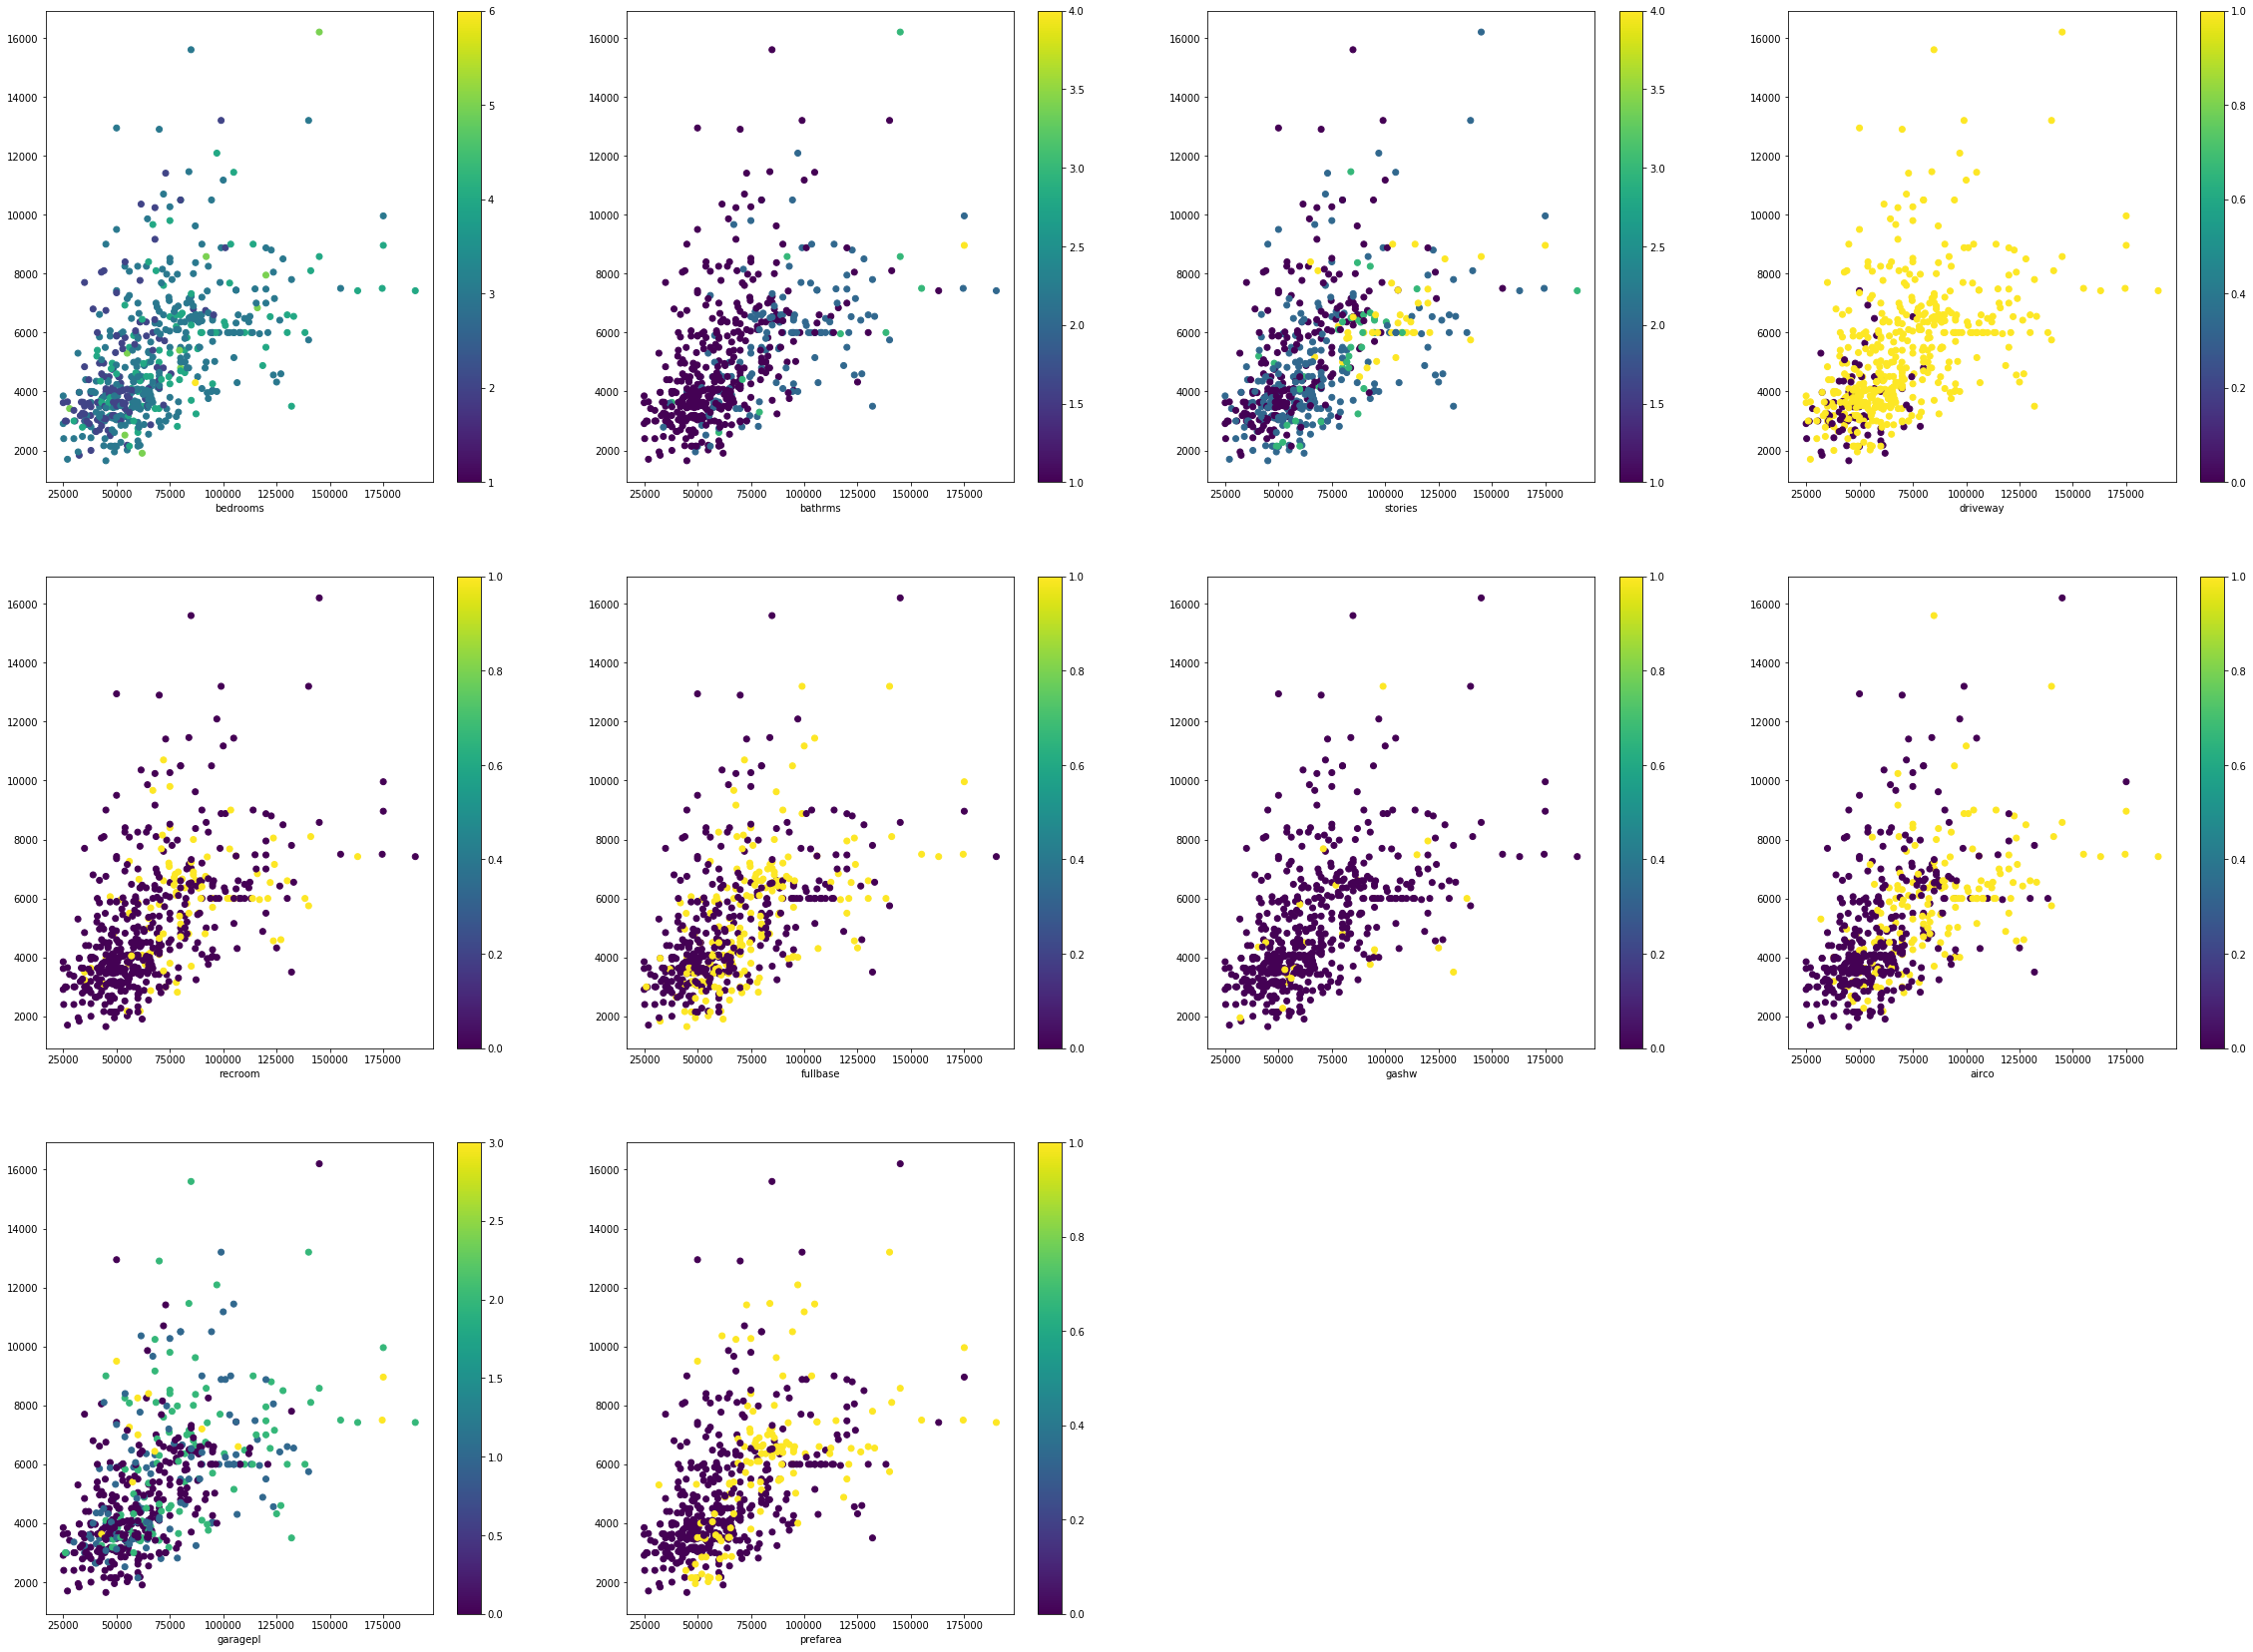

In [8]:
plt.figure(figsize=(40,40))
for i in range(2,12):
    plt.subplot(4,4,i-1)
    plt.xlabel(data.columns[i])
    plt.scatter(data.iloc[:,0],data.iloc[:,1],c=data.iloc[:,i])
    plt.colorbar()

In [9]:
pmax=data.loc[:,'price'].max()
pmin=data.loc[:,'price'].min()
data.loc[:,'price']=data.loc[:,'price'].apply(lambda x:(x-pmin)/(pmax-pmin))

In [10]:
lmax=data.loc[:,'lotsize'].max()
lmin=data.loc[:,'lotsize'].min()
data.loc[:,'lotsize']=data.loc[:,'lotsize'].apply(lambda x:(x-lmin)/(lmax-lmin))

In [11]:
data.head(1)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,0.10303,0.28866,3,1,2,1,0,1,0,0,1,0


In [12]:
dataset=data.values

In [13]:
split_ratio=0.8
tot_data=dataset.shape[0]

In [14]:
xtrain=dataset[:int(tot_data*split_ratio),1:]
ytrain=dataset[:int(tot_data*split_ratio),:1]

xtest=dataset[int(tot_data*split_ratio):,1:]
ytest=dataset[int(tot_data*split_ratio):,:1]

In [15]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((436, 11), (436, 1), (110, 11), (110, 1))

In [16]:
inputs=xtrain.shape[1]
outputs=ytrain.shape[1]
learning_rate=0.01
x_axis = []
y_axis = []

In [17]:
w=np.random.random(size=(inputs,outputs))
b=np.random.random(size=(outputs,))
w.shape,b.shape

((11, 1), (1,))

In [18]:
def forward(x):
    return np.dot(x,w)+b

In [19]:
def diff(y,y_):
    out=(y_- y)
    return out

In [20]:
def mse(y,y_):
    return np.mean(np.multiply(y-y_ , y-y_))

In [21]:
def train():
    warr=[]
    for epoch in range(1000):

        ypred=forward(xtrain)
        l=diff(ytrain,ypred).reshape(-1)
        y_axis.append((l.mean())**2)
        x_axis.append(epoch)
        for i in range(inputs):
            dw=np.mean(np.multiply(l,xtrain[:,i]))
            w[i]=w[i]- learning_rate*(dw)
        
        b[0] = b[0] - learning_rate*np.mean(l)
        
        if(epoch%10==0):
            print("Epoch : {}".format(epoch))

train()

Epoch : 0
Epoch : 10
Epoch : 20
Epoch : 30
Epoch : 40
Epoch : 50
Epoch : 60
Epoch : 70
Epoch : 80
Epoch : 90
Epoch : 100
Epoch : 110
Epoch : 120
Epoch : 130
Epoch : 140
Epoch : 150
Epoch : 160
Epoch : 170
Epoch : 180
Epoch : 190
Epoch : 200
Epoch : 210
Epoch : 220
Epoch : 230
Epoch : 240
Epoch : 250
Epoch : 260
Epoch : 270
Epoch : 280
Epoch : 290
Epoch : 300
Epoch : 310
Epoch : 320
Epoch : 330
Epoch : 340
Epoch : 350
Epoch : 360
Epoch : 370
Epoch : 380
Epoch : 390
Epoch : 400
Epoch : 410
Epoch : 420
Epoch : 430
Epoch : 440
Epoch : 450
Epoch : 460
Epoch : 470
Epoch : 480
Epoch : 490
Epoch : 500
Epoch : 510
Epoch : 520
Epoch : 530
Epoch : 540
Epoch : 550
Epoch : 560
Epoch : 570
Epoch : 580
Epoch : 590
Epoch : 600
Epoch : 610
Epoch : 620
Epoch : 630
Epoch : 640
Epoch : 650
Epoch : 660
Epoch : 670
Epoch : 680
Epoch : 690
Epoch : 700
Epoch : 710
Epoch : 720
Epoch : 730
Epoch : 740
Epoch : 750
Epoch : 760
Epoch : 770
Epoch : 780
Epoch : 790
Epoch : 800
Epoch : 810
Epoch : 820
Epoch : 830
Epo

In [33]:
def denorm(y):
    return (y*(pmax-pmin))+pmin


def test():
    ypred=forward(xtest)
    index=20
    print(denorm(ypred[index]),denorm(ytest[index]))
    e = mse(ytest,ypred)
    print(e)
test()

[104339.30484878592] [79500.0]
0.030015771483063416


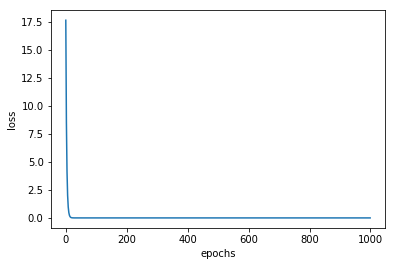

In [29]:
plt.plot(x_axis , y_axis)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [30]:
w

array([[ 0.38905952],
       [-0.05662658],
       [-0.02686184],
       [ 0.05756324],
       [-0.0262777 ],
       [ 0.17501453],
       [ 0.03705974],
       [ 0.66803669],
       [ 0.16050452],
       [ 0.01450546],
       [ 0.08517564]])